In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as ol
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'  # 将字体设置为Arial，这是一种通常支持负号显示的字体
from sklearn.decomposition import PCA
import statsmodels.api as sm
import seaborn as sns
import time
from tqdm import tqdm
import os

In [29]:
# print(df.columns)
# df=df[["Total number of households","Greening rate","Floor area ratio","above-ground parking fee（/month USD）","Property management fee（/m²/month USD）"]]
def ztrans(df):
    for col in df.columns:
        std=df[col].std()
        mean=df[col].mean()
        for i in range (len(df[col])):
            df[col].iloc[i]=(df[col].iloc[i]-mean)/std

# df=df[["Total number of households","Floor area ratio"]]
# print(df)
def drawcorpic(df):
    r=df.corr()
    # 设置图形大小
    plt.figure(figsize=(8, 6))
    # 绘制热力图
    g = sns.heatmap(r, cmap='coolwarm', annot=True, fmt='.2f',
                    square=True, linewidths=.5, vmin=-1, vmax=1)
    # 设置标题
    g.set_title('相关系数矩阵热力图')

    # # 显示图形
    plt.show()


In [30]:
#处理缺失值+
def miss(df):
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].mean())

# print(df.isnull().sum())
#Z变换
# print(ar.shape)
# mu=ar.mean(axis=0)
# print(mu.shape)
# s=ar.std(axis=0,ddof=1)
# print(s.shape)
def throw(df):
    for col in df.columns:
        for j in range (len(df[col])):
            if type(df[col].iloc[j])==str:
                if df[col].iloc[j][-1]=="°"or"）":
                    df[col].iloc[j]=0          
    df=df.astype("float")
    for i in df.columns:
        if df[i].sum()==0:
            df=df.drop(columns=[i])
 
    return df

In [31]:
def cumcontribution(allratio):
    # 设置柱状图的横坐标，这里是主成分的序号
    x_labels = np.arange(1, len(allratio) + 1)
    # 绘制柱状图
    plt.bar(x_labels, allratio)
    # 设置图表的标题、坐标轴标签等
    plt.title("累计贡献率（柱状图）")
    plt.xlabel("主成分序号")
    plt.ylabel("累计贡献率")
    # 显示图表
    plt.show()

def apca(df):
    pca = PCA()
    ar=df.values
    ar=ar.astype(float)
    ar=np.where(np.isnan(ar), 0, ar)
    r=np.corrcoef(ar[:,1:].T)
    md1=pca.fit(ar[:,1:])
    #特征
    lamda=md1.explained_variance_
    #各主成分贡献率
    ratio=md1.explained_variance_ratio_
    #主成分系数
    xs=md1.components_
    vector=np.round(xs,4)
    #累计贡献率
    allratio=np.cumsum(md1.explained_variance_ratio_)
    w=0
    for i in allratio:
        w+=1
        if i>=0.9:
            break
    return w,ar,xs,allratio


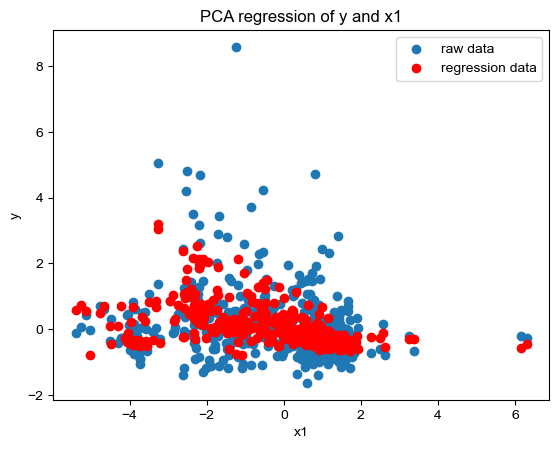

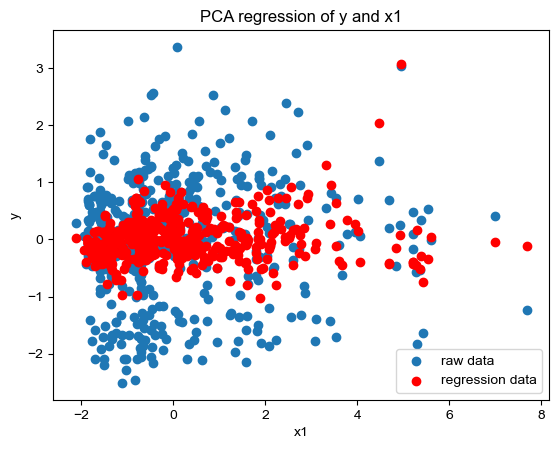

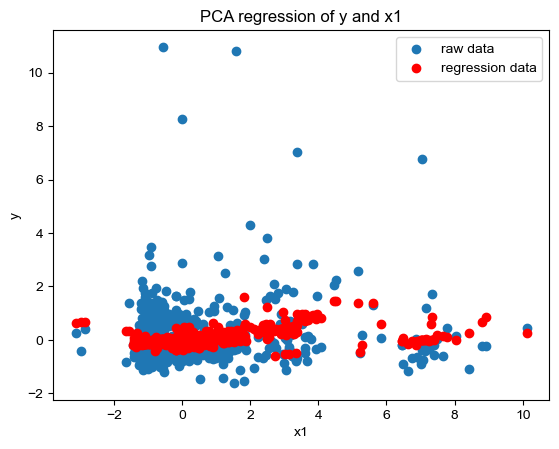

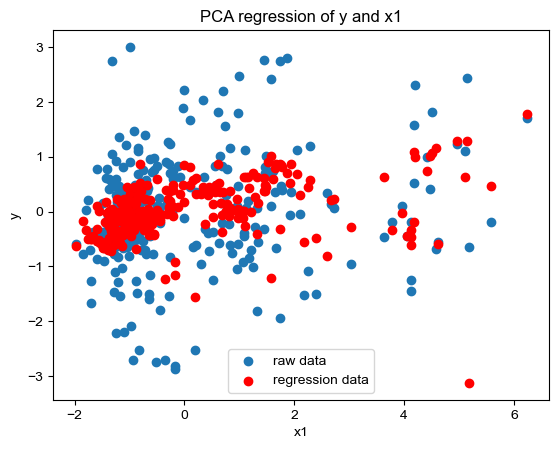

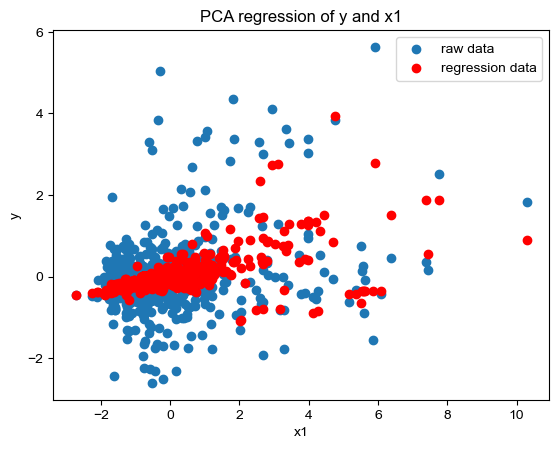

C:\Users\Dell\AppData\Local\Temp\ipykernel_24332\2476016088.py:8: RuntimeWarning: invalid value encountered in double_scalars
  df[col].iloc[i]=(df[col].iloc[i]-mean)/std
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D

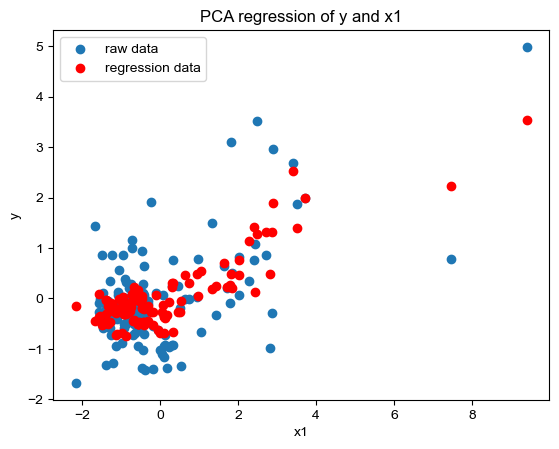

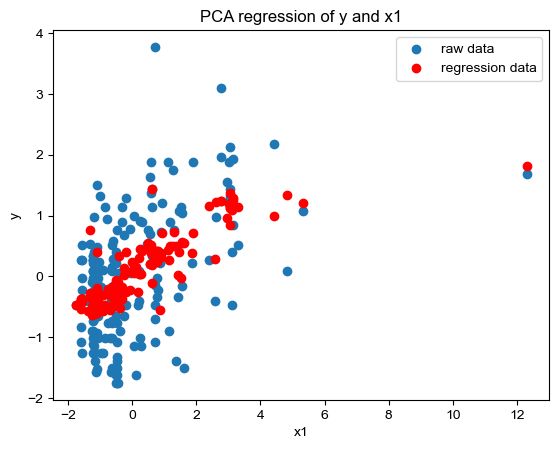

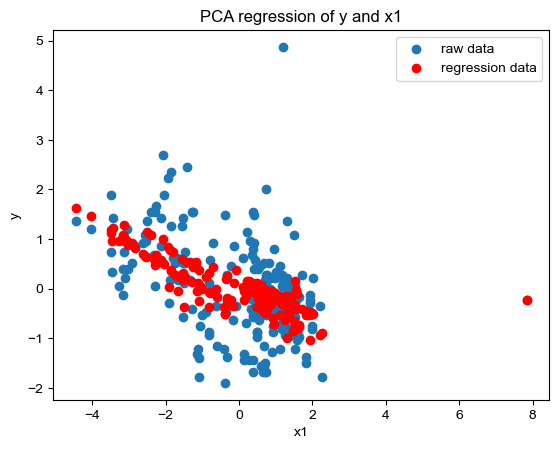

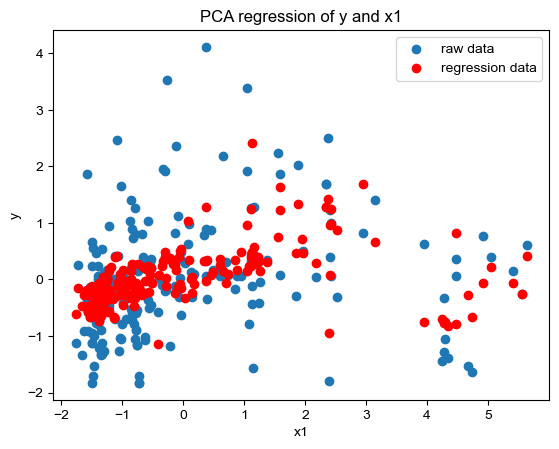

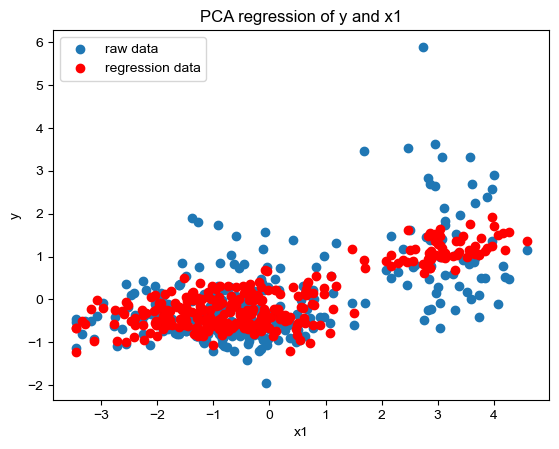

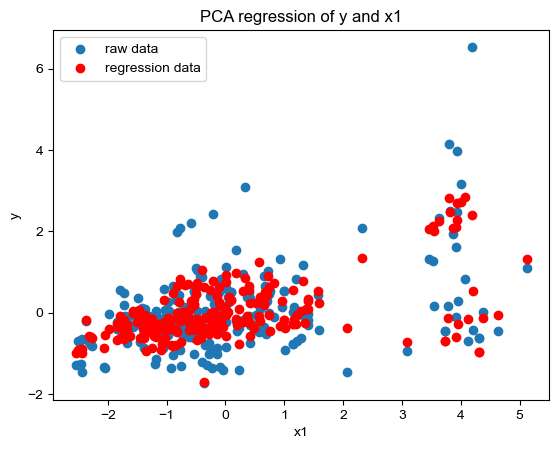

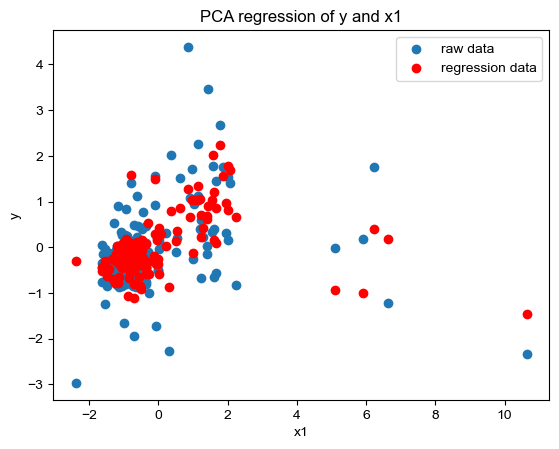

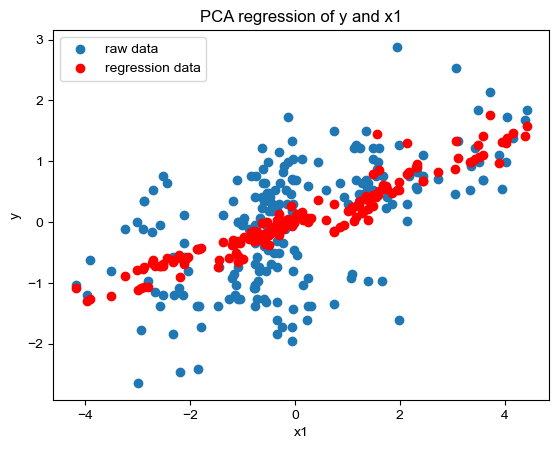

C:\Users\Dell\AppData\Local\Temp\ipykernel_24332\2476016088.py:8: RuntimeWarning: invalid value encountered in double_scalars
  df[col].iloc[i]=(df[col].iloc[i]-mean)/std
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D

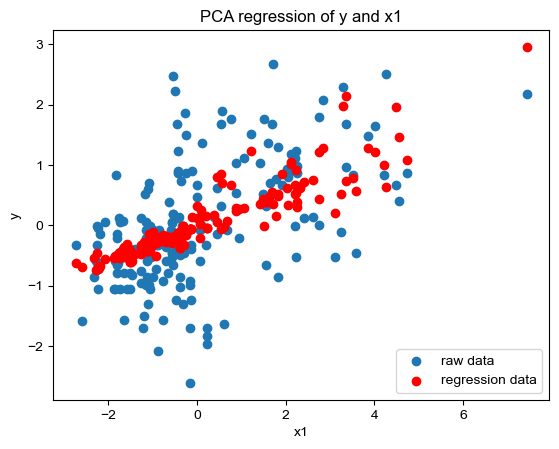

In [36]:
def drawreg():
        # 直接回归的残差
    direct_residual = md2.mse_resid
def drawregress(interval,model):
        # 绘制拟合图
        y_pred = model.predict(interval)
        plt.scatter(interval['x'][:,0], interval['y'], label='raw data')
        plt.scatter(interval['x'][:,0], y_pred, color='r', label='regression data')
        plt.title('PCA regression of y and x1')
        plt.xlabel('x1')
        plt.ylabel('y')
        plt.legend()
        plt.show()
def pcaregress(n,ar,xs):
    mean=ar.mean(axis=0)
    std=ar.std(axis=0,ddof=1)
    a=ar[:,0]*std[0]+mean[0]
    trans=ar[:,1:]@xs[:n,:].T
    interval={'y':a,'x':trans}
    model=sm.formula.ols('y~x',interval).fit()
    parain=model.params.values
    
    #常熟项系数
    outpara=parain[0]-sum(parain[1:]@xs[:n,:]*mean[:1:]/std[:1:])
    #weight
    weight=parain[1:]@xs[:n,:]/std[:1:]                  
    weight=np.append(weight,outpara)
    mse=model.mse_resid
    drawregress(interval,model)
    return weight,mse
def add(arr,n):
    le=len(arr)
    for i in range(n-le):
        arr=np.append(arr,0)
    return arr
def recycle(n):
    path='C://Users//Dell//Desktop//2024“ShuWei Cup”_Problem//2024_“ShuWei Cup”D_Problem'
    dfa={}
    mfa={}
    path1=path+"//城市{}不同地区".format(n)
    for sub in os.listdir(path1):
        path2=os.path.join(path1,sub)
        df=pd.read_excel(path2)
        miss(df)
        df=throw(df)
        ztrans(df)
        apca(df)
        #cumcontribution(apca(df)[3])
        pcaregress(apca(df)[0],apca(df)[1],apca(df)[2])
#         dfa[sub[:6]]=add(a[0],20)
#         mfa[sub[:6]]=np.array([a[1]])
#     dfa=pd.DataFrame(dfa)
#     dfa.to_excel(path+"//city{}的回归系数.xlsx".format(n))
#     mfa=pd.DataFrame(mfa)
#     mfa.to_excel(path+"//city{}的MSE.xlsx".format(n))
    
recycle(1)
# recycle(2)
        




